# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/ethereum_train_8_2.csv", parse_dates=True,
                       index_col=0).drop(columns=['Open', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Close'].values.copy().reshape(-1, 1)
df_train.head()


,Close
Date,
2020-06-01,0.24797
2020-06-02,0.23794
2020-06-03,0.24452
2020-06-04,0.24337
2020-06-05,0.24023


In [3]:
df_test = pd.read_csv("../../../Dataset/ethereum_test_8_2.csv", parse_dates=True,
                      index_col=0).drop(columns=['Open', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Close'].values.copy().reshape(-1, 1)
df_test.head()


,Close
Date,
2022-01-07,3.19531
2022-01-08,3.08002
2022-01-09,3.15030
2022-01-10,3.08543
2022-01-11,3.23789


# Vẽ đồ thị

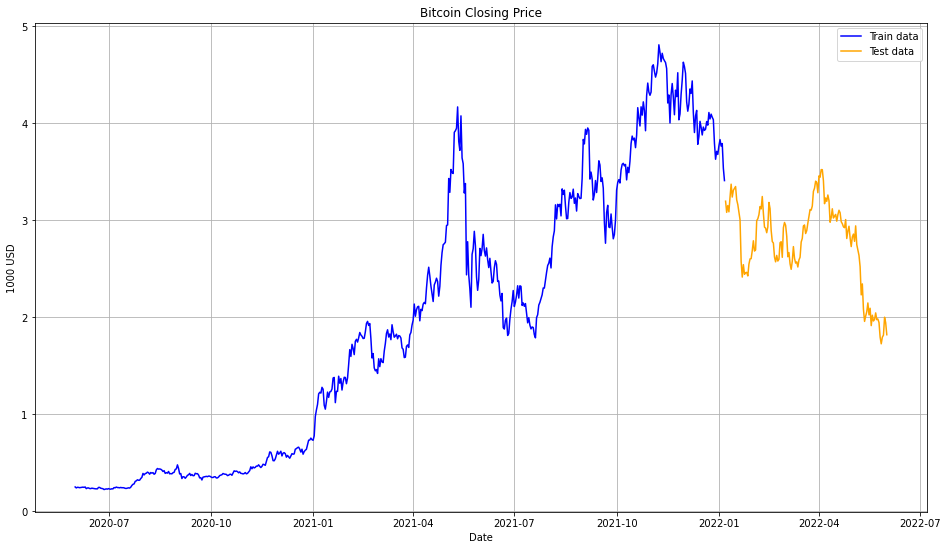

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Close'], 'blue', label='Train data')
plt.plot(df_test['Close'], 'orange', label='Test data')
plt.legend()


# Tách dữ liệu thành tập train và test

In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(585, 1)
(146, 1)


In [6]:
train_data

,Close
Date,
2020-06-01,0.24797
2020-06-02,0.23794
2020-06-03,0.24452
2020-06-04,0.24337
2020-06-05,0.24023
...,...
2022-01-02,3.83067
2022-01-03,3.76424
2022-01-04,3.78952


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-816.249, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-810.750, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-817.789, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-817.521, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-811.573, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-815.837, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-818.811, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-813.829, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-817.968, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-815.782, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-819.500, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-817.962, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-818.267, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-814.342, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 412.750
Date:                Sun, 26 Jun 2022   AIC                           -819.500
Time:                        15:11:12   BIC                           -806.390
Sample:                             0   HQIC                          -814.390
                                - 585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8305      0.076    -10.894      0.000      -0.980      -0.681
ma.L1          0.7508      0.095      7.867      0.000       0.564       0.938
sigma2         0.0142      0.000     35.769      0.000       0.013       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):              1765.88
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):              77.10   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([3.40014431, 3.40647765, 3.40121764, 3.40558622, 3.401958  ,
       3.40497133, 3.40246868, 3.4045472 , 3.40282093, 3.40425464,
       3.40306391, 3.40405284, 3.4032315 , 3.40391365, 3.40334711,
       3.40381763, 3.40342685, 3.40375141, 3.40348185, 3.40370572,
       3.40351979, 3.40367421, 3.40354596, 3.40365248, 3.40356402,
       3.40363749, 3.40357647, 3.40362715, 3.40358506, 3.40362001,
       3.40359098, 3.40361509, 3.40359507, 3.4036117 , 3.40359789,
       3.40360936, 3.40359983, 3.40360774, 3.40360117, 3.40360663,
       3.4036021 , 3.40360586, 3.40360273, 3.40360533, 3.40360317,
       3.40360497, 3.40360348, 3.40360471, 3.40360369, 3.40360454,
       3.40360383, 3.40360442, 3.40360393, 3.40360434, 3.403604  ,
       3.40360428, 3.40360405, 3.40360424, 3.40360408, 3.40360421,
       3.4036041 , 3.40360419, 3.40360412, 3.40360418, 3.40360413,
       3.40360417, 3.40360414, 3.40360417, 3.40360414, 3.40360416,
       3.40360415, 3.40360416, 3.40360415, 3.40360416, 3.40360

# Vẽ đồ thị cho tập test và kết quả dự đoán


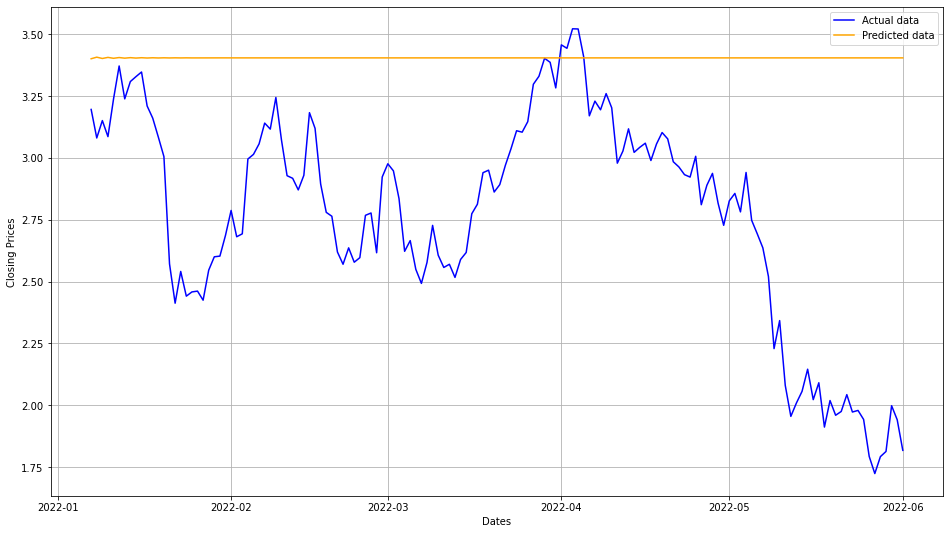

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 26.58%
RMSE: 0.77
R2: -213.71%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2022-01-07,3.19531,3.400144,-0.204834
2022-01-08,3.08002,3.406478,-0.326458
2022-01-09,3.15030,3.401218,-0.250918
2022-01-10,3.08543,3.405586,-0.320156
2022-01-11,3.23789,3.401958,-0.164068
...,...,...,...
2022-05-28,1.79268,3.403604,-1.610924
2022-05-29,1.81356,3.403604,-1.590044
2022-05-30,1.99846,3.403604,-1.405144
2022-05-31,1.94179,3.403604,-1.461814


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-1.610924,1.653696e+09
2022-05-29,-1.590044,1.653782e+09
2022-05-30,-1.405144,1.653869e+09
2022-05-31,-1.461814,1.653955e+09
2022-06-01,-1.585534,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(146, 1)
(146, 1)


<h1>Vẽ đồ thị thể hiện sai số

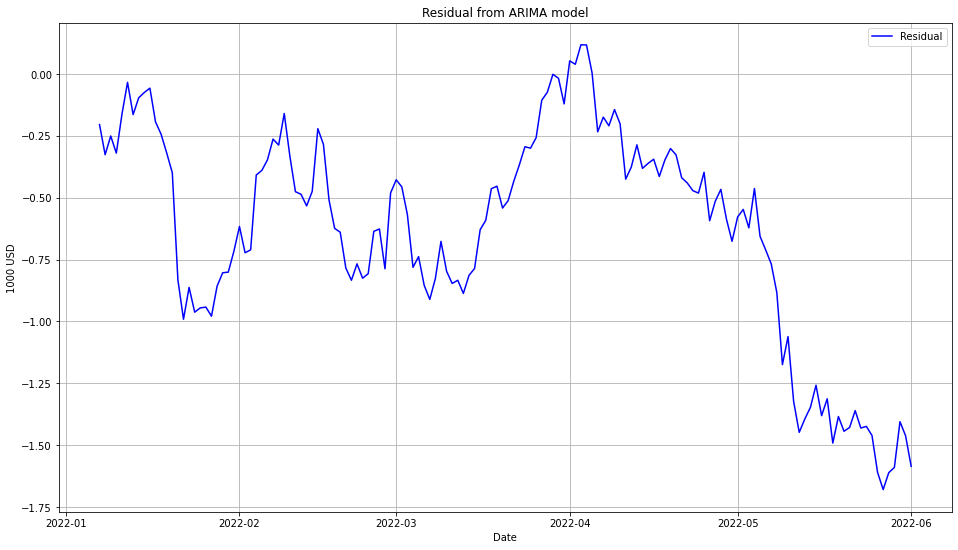

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=0.03 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=0.03 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=0.04 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=0.04 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=0.04 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=1.5000000000000002
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
195,rbf,0.11,4.9,0,0.004792,0.069224


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 0.63932195,  0.63916948,  0.63375514,  0.6230743 ,  0.60724435,
        0.58650771,  0.56123076,  0.5318986 ,  0.49910556,  0.46354147,
        0.42597416,  0.38722857,  0.34816314,  0.30964428,  0.27251987,
        0.23759261,  0.20559444,  0.17716286,  0.15282016,  0.13295645,
        0.11781698,  0.1074946 ,  0.10192729,  0.1009012 ,  0.10405884,
        0.11091217,  0.12086007,  0.13320941,  0.14719893,  0.16202493,
        0.17686782,  0.19091854,  0.20340382,  0.21360955,  0.22090142,
        0.22474223,  0.22470555,  0.22048544,  0.21190211,  0.19890377,
        0.18156477,  0.16008049,  0.13475947,  0.10601319,  0.07434414,
        0.04033266,  0.00462309, -0.03209052, -0.0690785 , -0.10558943,
       -0.14086356, -0.17414558, -0.20469685, -0.23180701, -0.25480501,
       -0.27306975, -0.28604018, -0.29322502, -0.29421197, -0.28867638,
       -0.27638921, -0.25722405, -0.23116297, -0.19830097, -0.15884858,
       -0.11313251, -0.06159388, -0.004784  ,  0.05664257,  0.12

# Vẽ đồ thị

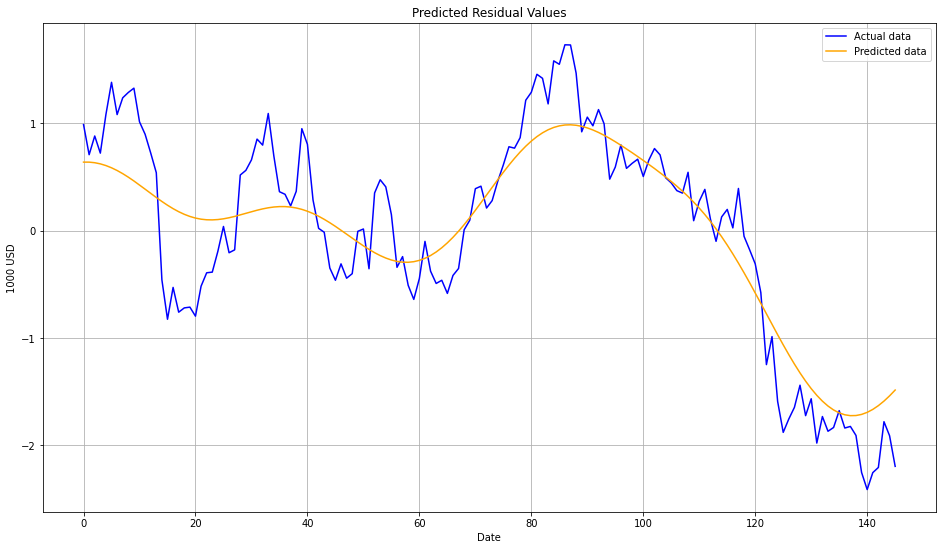

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,1.79268,3.403604,-1.610924,-1.355511,2.048093
2022-05-29,1.81356,3.403604,-1.590044,-1.340248,2.063357
2022-05-30,1.99846,3.403604,-1.405144,-1.321903,2.081701
2022-05-31,1.94179,3.403604,-1.461814,-1.300787,2.102817
2022-06-01,1.81807,3.403604,-1.585534,-1.277230,2.126374


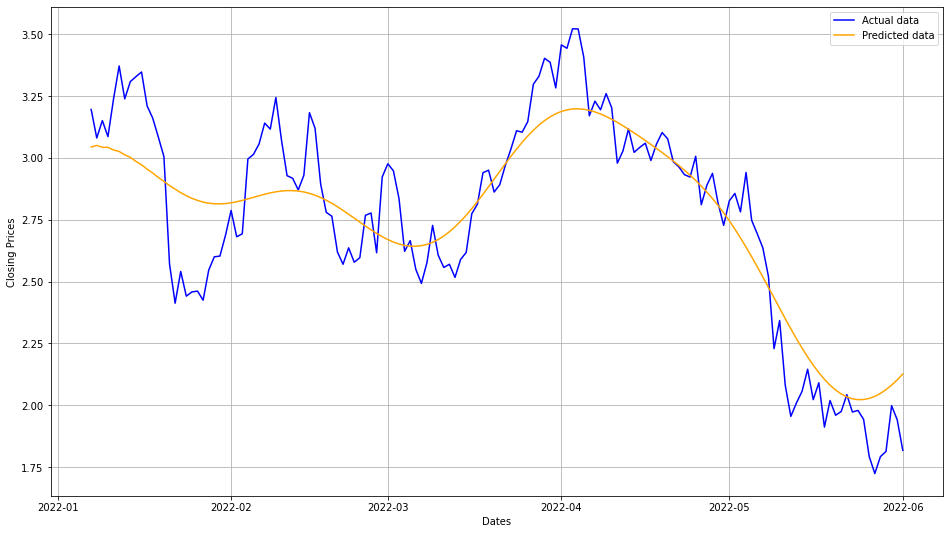

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 0.18
MAPE: 5.53%
R-Squared: 0.82
